Беру данные по акциям AMAZON с 24.11.2021 - 06.12.2021

In [2]:
import numpy as np

In [26]:
st1 = '267125 268858 262771 275478 261748 256000 254515 250952'

yt = np.array(list(map(int, st1.split(' '))))
yt_1 = np.array(list(map(int, st1.split(' ')))[:-1])
yt_2 = np.array(list(map(int, st1.split(' ')))[:-2])
yt_3 = np.array(list(map(int, st1.split(' ')))[:-3])
yt_4 = np.array(list(map(int, st1.split(' ')))[:-4]) 


Рассчитаем значения сигмы y1 y2

In [27]:
y1_y1_sr = [i - yt[1:].mean() for i in yt[1:]] # yi1-y1cp
y2_y2_sr = [i - yt_1.mean() for i in yt_1] # yi2-y2cp

y_r = sum(list(np.array(y1_y1_sr) * np.array(y2_y2_sr))) #(yi1-y1cp)*(yi2-y2cp)

In [28]:
y1_y1_sr_2 = sum(np.power(y1_y1_sr, 2)) #(yi1-y1cp)^2
y2_y2_sr_2 = sum(np.power(y2_y2_sr, 2)) # (yi2-y2cp)^2


In [29]:
# Сигмы y1 y2
sig_y1 = np.sqrt(y1_y1_sr_2/7) 
sig_y2 = np.sqrt(y2_y2_sr_2/7)
print(sig_y1, sig_y2)

7941.730611273642 6817.350427926003


Рассчитаем значения сигмы y3 y4

In [30]:
# Для сигмы y3 y4
y3_y3_sr = [i - yt[2:].mean() for i in yt[2:]] # (yi3-y3cp)
y3_y3_sr2 = sum([i**2 for i in y3_y3_sr]) # (yi3-y3cp)^2

y4_y4_sr = [i - yt_2.mean() for i in yt_2] # (yi4-y4cp)
y4_y4_sr2 = sum([i**2 for i in y4_y4_sr]) #(yi4-y4cp)^2

In [31]:
# Сигмы y3 y4
sig_y3 = np.sqrt(y3_y3_sr2/6) 
sig_y4 = np.sqrt(y4_y4_sr2/6)
print(sig_y3, sig_y4)

7936.169752048739 6124.7968401681155


Рассчитаем значения сигмы y5 y6

In [32]:
y5_y5_sr = [i - yt[3:].mean() for i in yt[3:]] # (yi5-y5cp)
y5_y5_sr2 = sum([i**2 for i in y5_y5_sr]) # (yi5-y5cp)^2

y6_y6_sr = [i - yt_3.mean() for i in yt_3] # (yi6-y6cp)
y6_y6_sr2 = sum([i**2 for i in y6_y6_sr]) #(yi6-y6cp)^2

In [33]:
# Сигмы y5 y6
sig_y5 = np.sqrt(y5_y5_sr2/5) 
sig_y6 = np.sqrt(y6_y6_sr2/5)
print(sig_y5, sig_y6)

8605.043488559486 4911.621687385949


Рассчитаем значения сигмы y7 y8

In [34]:
y7_y7_sr = [i - yt[4:].mean() for i in yt[4:]] # (yi7-y7cp)
y7_y7_sr2 = sum([i**2 for i in y7_y7_sr]) # (yi7-y7cp)^2

y8_y8_sr = [i - yt_4.mean() for i in yt_4] # (yi8-y8cp)
y8_y8_sr2 = sum([i**2 for i in y8_y8_sr]) #(yi8-y8cp)^2

In [35]:
# Сигмы y7 y8
sig_y7 = np.sqrt(y7_y7_sr2/4) 
sig_y8 = np.sqrt(y8_y8_sr2/4)
print(sig_y7, sig_y8)

3891.4321512137403 4569.443565687184


Получаем r

In [50]:
r_sp = []

In [51]:
# коэф автокорреляции первый лаг
r1 = y_r / (sig_y1 * sig_y2 * 7)
r_sp.append(r1)
r1

0.4831550002153058

In [52]:
# коэф автокорреляции второй лаг
r2 = sum(list(np.array(y3_y3_sr) * np.array(y4_y4_sr))) / (sig_y3 * sig_y4 * 6)
r_sp.append(r2)
r2 

0.40659186360706806

In [53]:
# коэф автокорреляции третий лаг
r3 = sum(list(np.array(y5_y5_sr) * np.array(y6_y6_sr))) / (sig_y5 * sig_y6 * 5)
r_sp.append(r3)
r3 

0.11060275797283041

In [54]:
# коэф автокорреляции четвертый лаг
r4 = sum(list(np.array(y7_y7_sr) * np.array(y8_y8_sr))) / (sig_y7 * sig_y8 * 5)
r_sp.append(r4)
r4 

-0.38888732413012167

Рисуем графики

In [40]:
import matplotlib.pyplot as plt

In [41]:
dt = '24.11.2021 26.11.2021 29.11.2021 30.11.2021 01.12.2021 02.12.2021 03.12.2021 06.12.2021'
dates = np.array(list(dt.split(' ')))

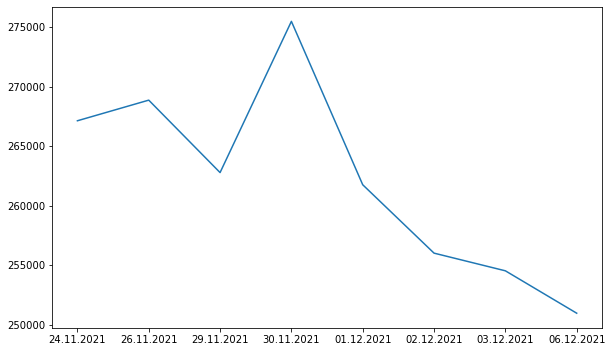

In [42]:
def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(25), cm_to_inch(15)))
plt.plot(dates, yt)

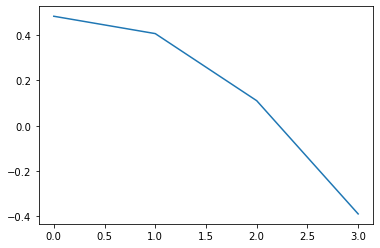

In [55]:
plt.plot(r_sp)